In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# TRAIN DATASET

In [2]:
df = pd.read_csv('latih.csv')
df

hotel  is_canceled  \
0                        Crystal Cove, Barbados Barbados            0   
1                    Greensboro Courtyard Greensboro, NC            1   
2       The Westin Peachtree Plaza, Atlanta Atlanta, GA             1   
3      Courtyard by Marriott Aberdeen Airport Aberdee...            0   
4                 W New York – Union Square New York, NY            1   
...                                                  ...          ...   
83288                    Crystal Cove, Barbados Barbados            0   
83289              Berlin Marriott Hotel Berlin, Germany            0   
83290               The Ritz-Carlton, Tokyo Tokyo, Japan            0   
83291                     Colony Club, Barbados Barbados            0   
83292                  Las Vegas Marriott Las Vegas, NV             0   

       lead_time  arrival_date_year arrival_date_month  \
0              8               2019            January   
1            524               2018           December   
2            175               2019                May   
3              0               2018            October   
4             33               2017          September   
...          ...                ...                ...   
83288          4               2018            October   
83289         30               2017          September   
83290        165               2019               June   
83291        180               2018               July   
83292        290               2018            October   

       arrival_date_week_number  arrival_date_day_of_month  \
0                             2                         10   
1                            51                         15   
2                            20                         19   
3                            43                         17   
4                            39                         26   
...                         ...                        ...   
83288                        44                         25   
83289                        38                         14   
83290                        25                         21   
83291                        32                         31   
83292                        43                         20   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  \
0                            0                     4       2  ...  314.0   
1                            0                     2       2  ...    1.0   
2                            1                     2       2  ...   12.0   
3                            1                     0       1  ...    NaN   
4                            2                     3       2  ...   16.0   
...                        ...                   ...     ...  ...    ...   
83288                        0                     2       2  ...    9.0   
83289                        1                     3       2  ...    9.0   
83290                        4                    10       2  ...    NaN   
83291                        2                     4       2  ...    9.0   
83292                        2                     3       2  ...    9.0   

       company days_in_waiting_list    customer_type     adr  \
0          NaN                    0        Transient   38.40   
1          NaN                    0        Transient   62.80   
2          NaN                    0        Transient  110.00   
3        200.0                    0        Transient   45.00   
4          NaN                    0        Transient   57.92   
...        ...                  ...              ...     ...   
83288      NaN                    0        Transient  169.00   
83289      NaN                    0        Transient   94.50   
83290      NaN                    0        Transient  123.50   
83291      NaN                    0        Transient  122.25   
83292      NaN                    0  Transient-Party   90.95   

      required_car_parking_spaces  total_of_specia

# TEST DATASET

In [3]:
df1 = pd.read_csv('test.csv')
df1

hotel  lead_time  \
0      Fort Worth University Drive Courtyard Fort Wor...         46   
1      Sacramento Airport Natomas Courtyard Sacrament...         98   
2      Residence Inn Las Vegas Convention Center Las ...        171   
3      Courtyard by Marriott Rio de Janeiro Barra da ...          2   
4                Leipzig Marriott Hotel Leipzig, Germany        167   
...                                                  ...        ...   
35693                           Waves, Barbados Barbados         59   
35694                Mt. Laurel Courtyard Mt. Laurel, NJ         62   
35695              Orlando Airport Courtyard Orlando, FL        114   
35696            Leipzig Marriott Hotel Leipzig, Germany          0   
35697      Heidelberg Marriott Hotel Heidelberg, Germany          0   

       arrival_date_year arrival_date_month  arrival_date_week_number  \
0                   2019               July                        27   
1                   2017           November                        48   
2                   2019               July                        30   
3                   2018            January                         1   
4                   2019                May                        20   
...                  ...                ...                       ...   
35693               2018              March                        14   
35694               2019               June                        23   
35695               2018               July                        27   
35696               2018           February                         7   
35697               2017             August                        35   

       arrival_date_day_of_month  stays_in_weekend_nights  \
0                              3                        1   
1                             23                        1   
2                             28                        0   
3                              2                        0   
4                             14                        2   
...                          ...                      ...   
35693                         28                        1   
35694                          5                        1   
35695                          1                        1   
35696                          8                        1   
35697                         24                        1   

       stays_in_week_nights  adults  children  ...  agent company  \
0                         0       2       0.0  ...   79.0     NaN   
1                         2       1       0.0  ...   37.0     NaN   
2                         1       2       0.0  ...  168.0     NaN   
3                         1       2       0.0  ...  240.0     NaN   
4                         1       2       0.0  ...    9.0     NaN   
...                     ...     ...       ...  ...    ...     ...   
35693                     3       2       0.0  ...    9.0     NaN   
35694                     1       2       0.0  ...    9.0     NaN   
35695                     2       1       0.0  ...  192.0     NaN   
35696                     0       2       0.0  ...    NaN     NaN   
35697                     0       2       2.0  ...    NaN     NaN   

      days_in_waiting_list    customer_type     adr  \
0                        0        Transient   89.38   
1                        0  Transient-Party   70.00   
2                        0        Transient   80.10   
3                        0        Transient   66.00   
4                        0        Transient  126.00   
...                    ...              ...     ...   
35693                    0        Transient   85.85   
35694                    0        Transient  126.00   
35695                    0        Transient   75.00   
35696                    0        Transient   65.00   
35697                    0        Transient  153.00   

       required_car_parking_spaces  total_of_special_requests  \
0                                

## DATA CLEANING

### TRAIN DATA CLEANING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

In [5]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             346
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11404
company                           78559


In [6]:
((df.shape[0] - df.dropna().shape[0])/df.shape[0])*100

99.81511051348852

checking missing value

### Data Imputation

In [7]:
df['children'].fillna(df['children'].median(), inplace = True)

In [8]:
df['country'].fillna(df['country'].mode(), inplace = True)

In [9]:
df['agent'].fillna(df['agent'].median(), inplace = True)

In [10]:
df['company'].fillna(df['company'].median(), inplace = True)

__RECHECKING AGAIN__

In [11]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           346
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [12]:
missing_data = ((df.isna().sum()/df.shape[0])*100).round(2)

missing_data = pd.DataFrame(missing_data)
missing_data.style.background_gradient(cmap = 'Greens')

In [13]:
df = df.dropna()

drop the missing value because its < 5%

__DROP DUPLICATE VALUE__

In [14]:
df.duplicated().sum()

0

### TEST DATA CLEANING

In [15]:
df1.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              1
babies                                0
meal                                  0
country                             142
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              4925
company                           33636
days_in_waiting_list                  0


In [16]:
df1['children'].fillna(df1['children'].median(), inplace = True)

In [17]:
df1['country'].fillna(df1['country'].mode(), inplace = True)

In [18]:
df1['agent'].fillna(df1['agent'].median(), inplace = True)

In [19]:
df1['company'].fillna(df1['company'].median(), inplace = True)

__RECHECKING MISSING VALUE__

In [20]:
df1.isna().sum()

hotel                               0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           142
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_type                       0
adr         

In [21]:
missing_data = ((df1.isna().sum()/df1.shape[0])*100).round(2)

missing_data = pd.DataFrame(missing_data)
missing_data.style.background_gradient(cmap = 'Greens')

In [22]:
df1 = df1.dropna()

dropping missing value because its < 5%

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35556 entries, 0 to 35697
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           35556 non-null  object 
 1   lead_time                       35556 non-null  int64  
 2   arrival_date_year               35556 non-null  int64  
 3   arrival_date_month              35556 non-null  object 
 4   arrival_date_week_number        35556 non-null  int64  
 5   arrival_date_day_of_month       35556 non-null  int64  
 6   stays_in_weekend_nights         35556 non-null  int64  
 7   stays_in_week_nights            35556 non-null  int64  
 8   adults                          35556 non-null  int64  
 9   children                        35556 non-null  float64
 10  babies                          35556 non-null  int64  
 11  meal                            35556 non-null  object 
 12  country                         35556

__checking duplicate value__

In [24]:
df1.duplicated().sum()

0

## EXPLORATORY DATA ANALYSIS

In [25]:
for col in df.describe(include ='object').columns:
    print(df[col].unique())

['Crystal Cove, Barbados Barbados' 'Greensboro Courtyard Greensboro, NC'
 'The Westin Peachtree Plaza, Atlanta Atlanta, GA '
 'W New York – Union Square New York, NY'
 'Hotel Maria Cristina, San Sebastian San Sebastian, Spain'
 'W New York – Times Square New York, NY'
 'The Ritz-Carlton, Tokyo Tokyo, Japan'
 'Marriott Puerto Vallarta Resort & Spa Puerto Vallarta, Mexico'
 'Las Vegas Marriott Las Vegas, NV '
 'Heidelberg Marriott Hotel Heidelberg, Germany'
 'Sheraton Grand Rio Hotel & Resort Rio de Janeiro, Brazil'
 'Renaissance Hamburg Hotel Hamburg, Germany'
 'The Ritz-Carlton, Berlin Berlin, Germany'
 'Sheraton Lima Hotel & Convention Center Lima, Peru'
 'Courtyard Las Vegas Convention Center Las Vegas, NV '
 'Newark Liberty International Airport Courtyard Newark, NJ'
 'Indianapolis Airport Courtyard Indianapolis, IN'
 'Treasure Beach, Barbados Barbados'
 'Cape Town Marriott Hotel Crystal Towers Cape Town, South Africa'
 'The St. Regis Osaka Osaka, Japan'
 "Chicago O'Hare Courtyard D

array([[<Axes: title={'center': 'is_canceled'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_date_year'}>,
        <Axes: title={'center': 'arrival_date_week_number'}>,
        <Axes: title={'center': 'arrival_date_day_of_month'}>],
       [<Axes: title={'center': 'stays_in_weekend_nights'}>,
        <Axes: title={'center': 'stays_in_week_nights'}>,
        <Axes: title={'center': 'adults'}>,
        <Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'babies'}>],
       [<Axes: title={'center': 'is_repeated_guest'}>,
        <Axes: title={'center': 'previous_cancellations'}>,
        <Axes: title={'center': 'previous_bookings_not_canceled'}>,
        <Axes: title={'center': 'booking_changes'}>,
        <Axes: title={'center': 'agent'}>],
       [<Axes: title={'center': 'company'}>,
        <Axes: title={'center': 'days_in_waiting_list'}>,
        <Axes: title={'center': 'adr'}>,
        <Axes: title={'center': 'required_car

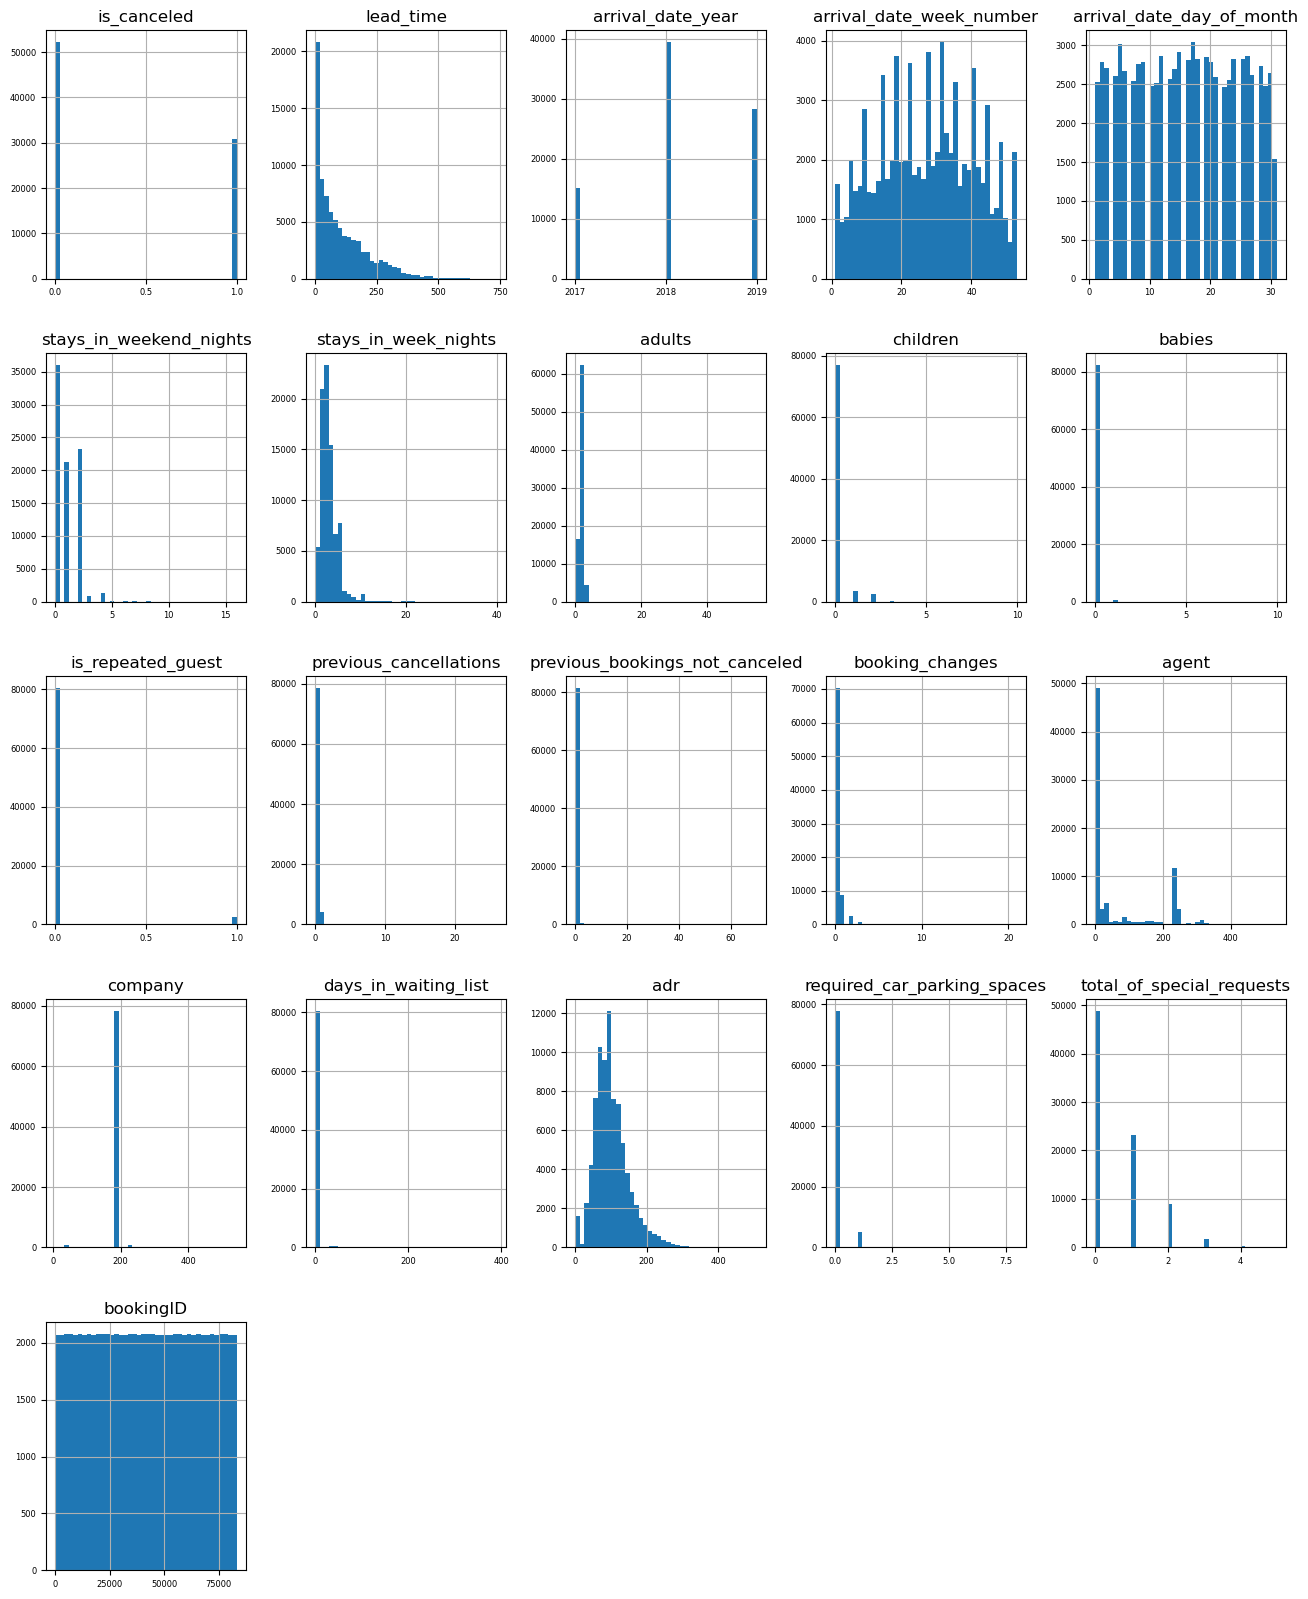

In [26]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6)

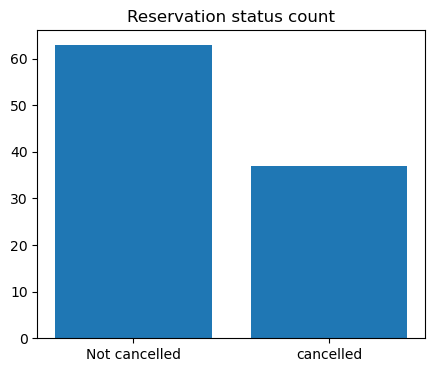

In [27]:
plt.figure(figsize=(5,4))
plt.title("Reservation status count")
plt.bar(["Not cancelled","cancelled"],df['is_canceled'].value_counts(normalize =True).mul(100))
plt.show()

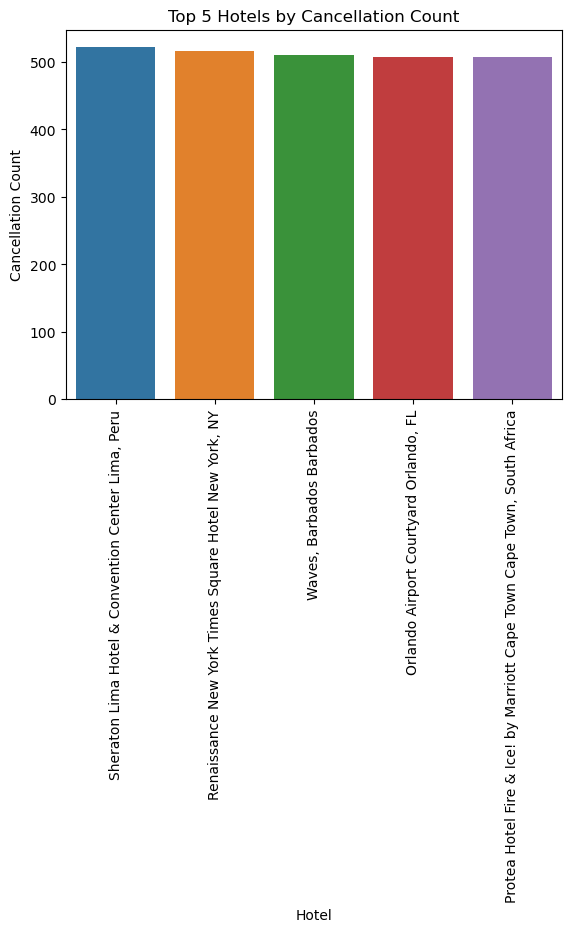

In [28]:
cancellation_count = df[df['is_canceled'] == 1].groupby('hotel')['is_canceled'].sum().reset_index(name='cancellation_count')

top_5_cancellations = cancellation_count.nlargest(5, 'cancellation_count')

sns.barplot(data=top_5_cancellations, x='hotel', y='cancellation_count')
plt.title('Top 5 Hotels by Cancellation Count')
plt.xlabel('Hotel')
plt.xticks(rotation=90)
plt.ylabel('Cancellation Count')
plt.show()

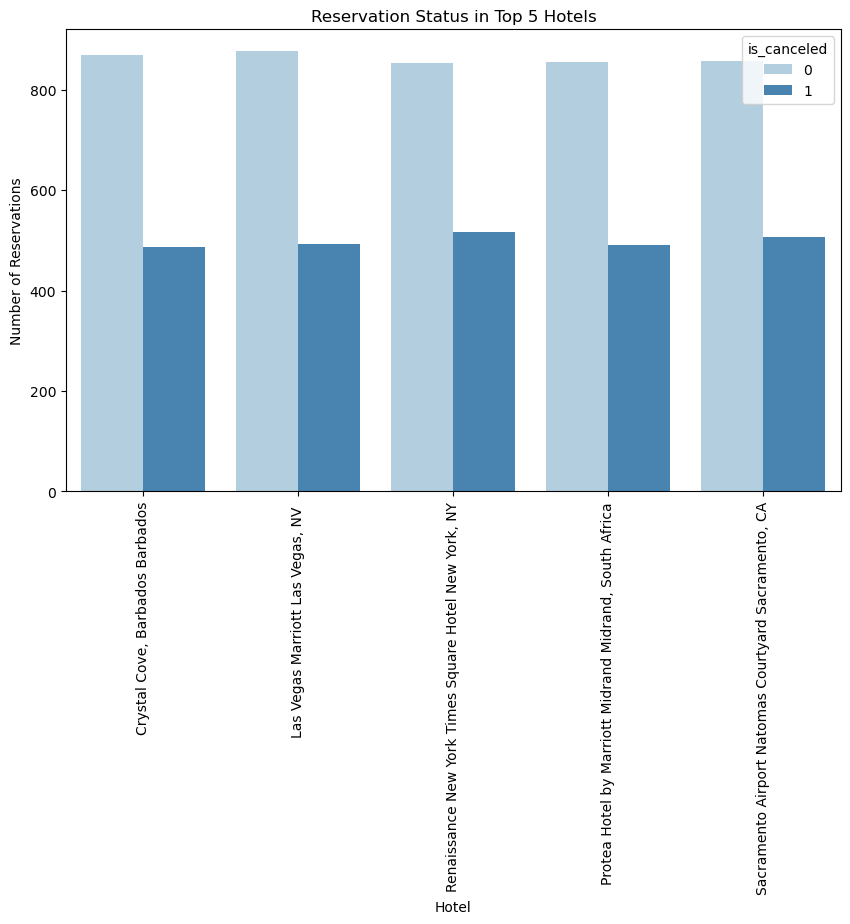

In [29]:
reservation_count = df.groupby('hotel').size().reset_index(name='total_reservations')

top_5_hotels = reservation_count.nlargest(5, 'total_reservations')

top_5_df = df[df['hotel'].isin(top_5_hotels['hotel'])]

plt.figure(figsize=(10, 6))
sns.countplot(data=top_5_df, x='hotel', hue='is_canceled', palette='Blues')
plt.title('Reservation Status in Top 5 Hotels')
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=90)
plt.show()

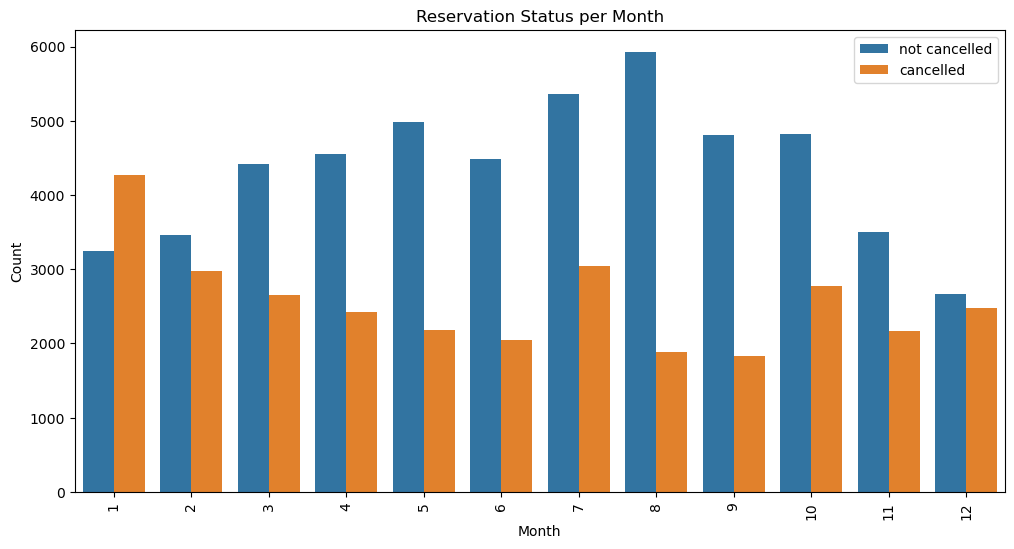

In [30]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='month', hue='is_canceled')
plt.title('Reservation Status per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(['not cancelled','cancelled'])
plt.xticks(rotation=90)
plt.show()

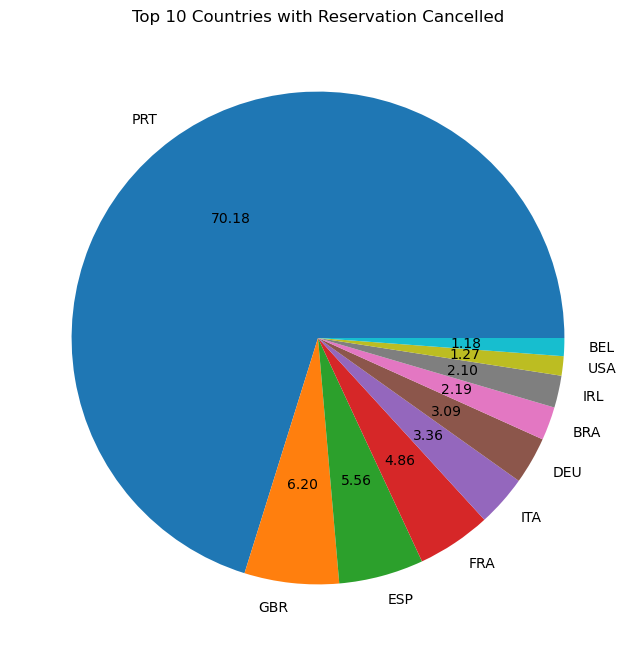

In [31]:
cancaled_data =df[df['is_canceled']==1]
top_10_countries=cancaled_data['country'].value_counts()[:10]
plt.figure(figsize=(8, 8))
plt.title('Top 10 Countries with Reservation Cancelled')
plt.pie(top_10_countries, autopct='%.2f',labels=top_10_countries.index)
plt.show()

In [32]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474809
Offline TA/TO    0.203503
Groups           0.166215
Direct           0.104018
Corporate        0.043257
Complementary    0.006233
Aviation         0.001953
Undefined        0.000012
Name: proportion, dtype: float64

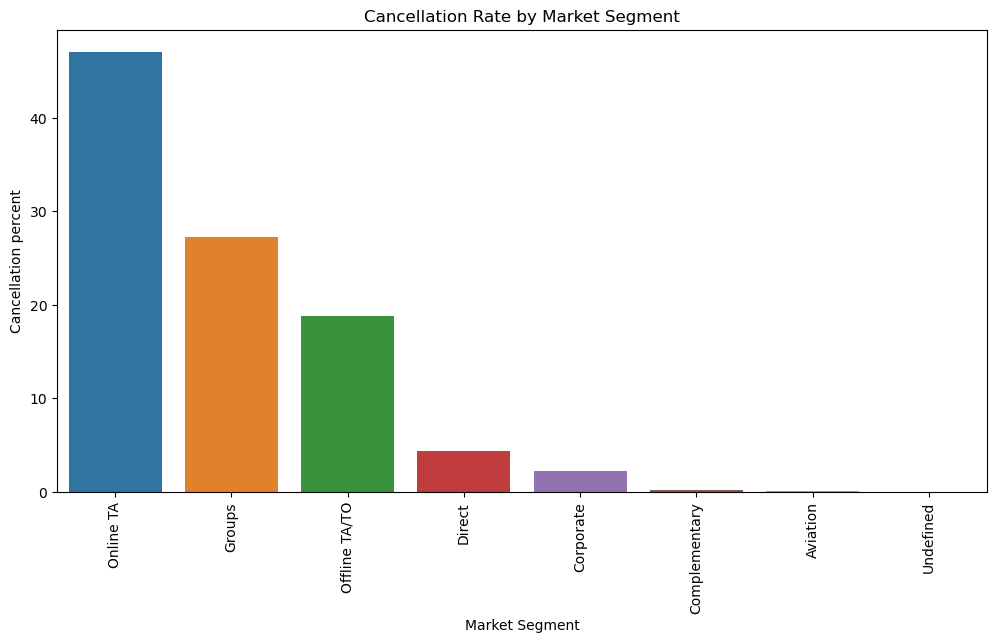

In [33]:
df_market_segment = cancaled_data['market_segment'].value_counts(normalize=True).mul(100)
plt.figure(figsize=(12, 6))
sns.barplot(x=df_market_segment.index,  y=df_market_segment.values)
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation percent')
plt.xticks(rotation=90)
plt.show()

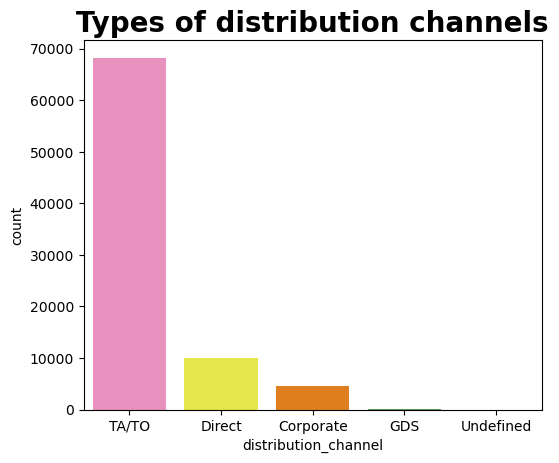

In [34]:
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'distribution_channel',  palette='Set1_r')
plt.title('Types of distribution channels',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

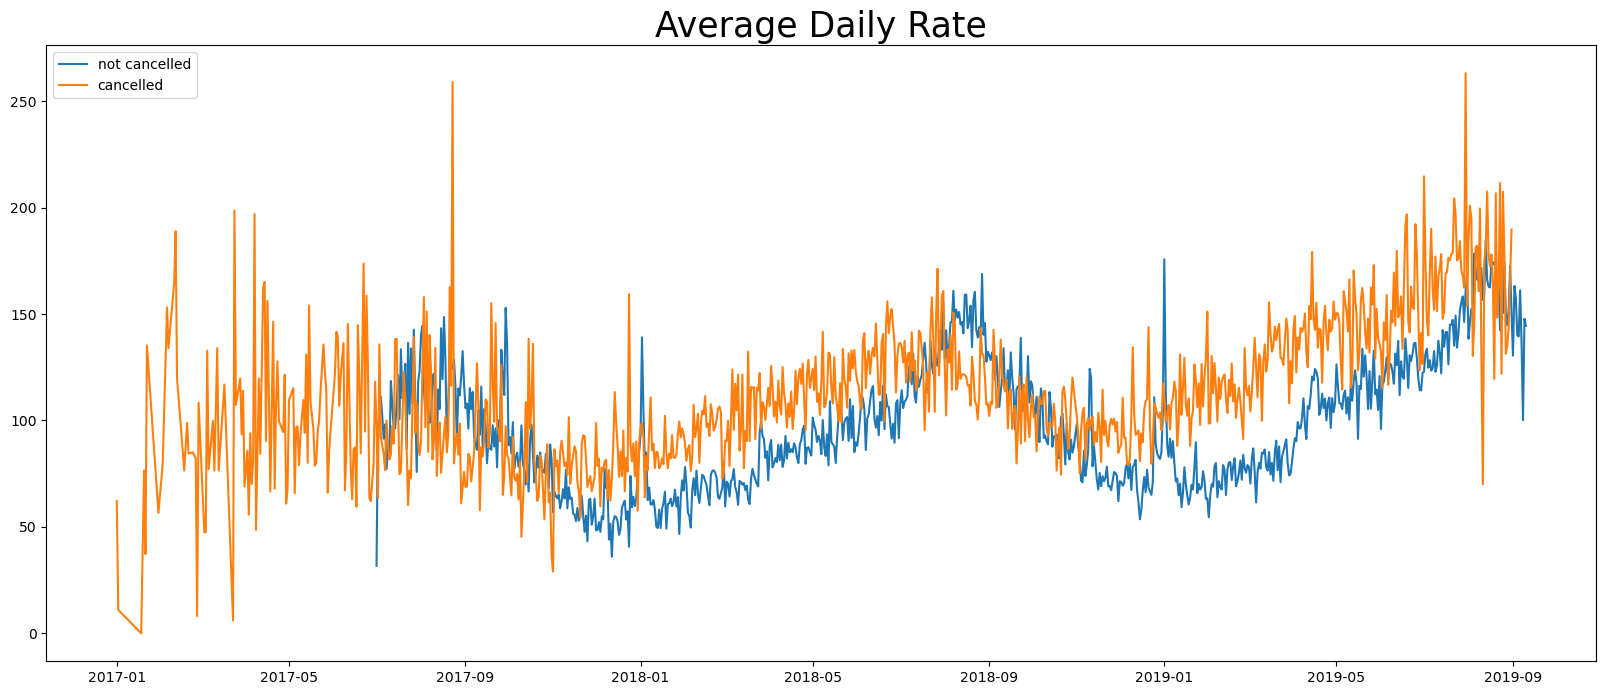

In [35]:
cancaled_df_adr = cancaled_data.groupby('reservation_status_date')[['adr']].mean()
cancaled_df_adr.reset_index(inplace=True)
cancaled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancaled_data =df[df['is_canceled'] ==0]
not_cancaled_df_adr = not_cancaled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancaled_df_adr.reset_index(inplace=True)
not_cancaled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(20,8))
plt.title('Average Daily Rate', fontsize=25)
plt.plot(not_cancaled_df_adr['reservation_status_date'], not_cancaled_df_adr['adr'], label='not cancelled')
plt.plot(cancaled_df_adr['reservation_status_date'], cancaled_df_adr['adr'], label='cancelled')
plt.legend()

## DATA PREPROCESSING

### ONE HOT ENCODING TRAIN AND TEST DATA

In [36]:
df1['is_canceled'] = [0 if x == 'Check-Out' else 1 for x in df1['reservation_status'].values]

In [37]:
df['country_PRT'] = df['country'].apply(lambda x: 1 if x == 'PRT' else 0)

df['country_GBR'] = df['country'].apply(lambda x: 1 if x == 'GBR' else 0)

df['country_others'] = df['country'].apply(lambda x: 0 if x in ['PRT', 'GBR'] else 1)

In [38]:
df1['country_PRT'] = df1['country'].apply(lambda x: 1 if x == 'PRT' else 0)

df1['country_GBR'] = df1['country'].apply(lambda x: 1 if x == 'GBR' else 0)

df1['country_others'] = df1['country'].apply(lambda x: 0 if x in ['PRT', 'GBR'] else 1)

### ORDINAL ENCODING

In [39]:
map_class = {'January':1,'February':2,'March':3,'April':4, 'May':5, 'June':6,'July':7,'August':8,'September':9,'October':10, 'November':11, 'December':12}
df['arrival_date_month'] = df['arrival_date_month'].map(map_class)

In [40]:
map_class = {'January':1,'February':2,'March':3,'April':4, 'May':5, 'June':6,'July':7,'August':8,'September':9,'October':10, 'November':11, 'December':12}
df1['arrival_date_month'] = df1['arrival_date_month'].map(map_class)

### FREQUENCY ENCODING

In [41]:
count_freq_meal = df.groupby('meal').size()
count_freq_meal
freq_ = count_freq_meal/len(df['meal'])
df['meal'] = df['meal'].map(freq_).round(2)

In [42]:
count_freq_meal1 = df1.groupby('meal').size()
count_freq_meal1
freq_df1 = count_freq_meal1/len(df1['meal'])
df1['meal'] = df1['meal'].map(freq_df1).round(2)

In [43]:
count_freq_marketsegment = df.groupby('market_segment').size()
count_freq_marketsegment
freq1_ = count_freq_marketsegment/len(df['market_segment'])
df['market_segment'] = df['market_segment'].map(freq1_).round(2)

In [44]:
count_freq_marketsegment1 = df1.groupby('market_segment').size()
count_freq_marketsegment1
freq1_df1 = count_freq_marketsegment1/len(df1['market_segment'])
df1['market_segment'] = df1['market_segment'].map(freq1_df1).round(2)

In [45]:
count_freq_distribution = df.groupby('distribution_channel').size()
count_freq_distribution
freq2_ = count_freq_distribution/len(df['distribution_channel'])
df['distribution_channel'] = df['distribution_channel'].map(freq2_).round(2)

In [46]:
count_freq_distribution1 = df1.groupby('distribution_channel').size()
count_freq_distribution1
freq2_df1 = count_freq_distribution1/len(df1['distribution_channel'])
df1['distribution_channel'] = df1['distribution_channel'].map(freq2_df1).round(2)

In [47]:
count_freq_reserved = df.groupby('reserved_room_type').size()
count_freq_reserved
freq3_= count_freq_reserved/len(df['reserved_room_type'])
df['reserved_room_type'] = df['reserved_room_type'].map(freq3_).round(2)

In [48]:
count_freq_reserved1 = df1.groupby('reserved_room_type').size()
count_freq_reserved1
freq3_df1= count_freq_reserved1/len(df1['reserved_room_type'])
df1['reserved_room_type'] = df1['reserved_room_type'].map(freq3_df1).round(2)

In [49]:
count_freq_assigned = df.groupby('assigned_room_type').size()
count_freq_assigned
freq4_= count_freq_assigned/len(df['assigned_room_type'])
df['assigned_room_type'] = df['assigned_room_type'].map(freq4_).round(2)

In [50]:
count_freq_assigned1 = df1.groupby('assigned_room_type').size()
count_freq_assigned1
freq4_df1= count_freq_assigned1/len(df1['assigned_room_type'])
df1['assigned_room_type'] = df1['assigned_room_type'].map(freq4_df1).round(2)

In [51]:
count_freq_deposit = df.groupby('deposit_type').size()
count_freq_deposit
freq5_= count_freq_deposit/len(df['deposit_type'])
df['deposit_type'] = df['deposit_type'].map(freq5_).round(2)

In [52]:
count_freq_deposit1 = df1.groupby('deposit_type').size()
count_freq_deposit1
freq5_df1= count_freq_deposit1/len(df1['deposit_type'])
df1['deposit_type'] = df1['deposit_type'].map(freq5_df1).round(2)

In [53]:
count_freq_customer = df.groupby('customer_type').size()
count_freq_customer
freq6_= count_freq_customer/len(df['customer_type'])
df['customer_type'] = df['customer_type'].map(freq6_).round(2)

In [54]:
count_freq_customer1 = df1.groupby('customer_type').size()
count_freq_customer1
freq6_df1 = count_freq_customer1/len(df1['customer_type'])
df1['customer_type'] = df1['customer_type'].map(freq6_df1).round(2)

## MODEL PREPARATION

In [55]:
df.drop(columns = ['hotel', 'reservation_status_date','bookingID', 'country', 'reservation_status'],inplace = True)
df1.drop(columns = ['hotel', 'reservation_status_date','bookingID', 'country', 'reservation_status'],inplace = True)

dropping some of column because its already encoded and we cant process the booking ID, object, etc

### CHECKING MULTICOLLINEARITY

<Axes: >

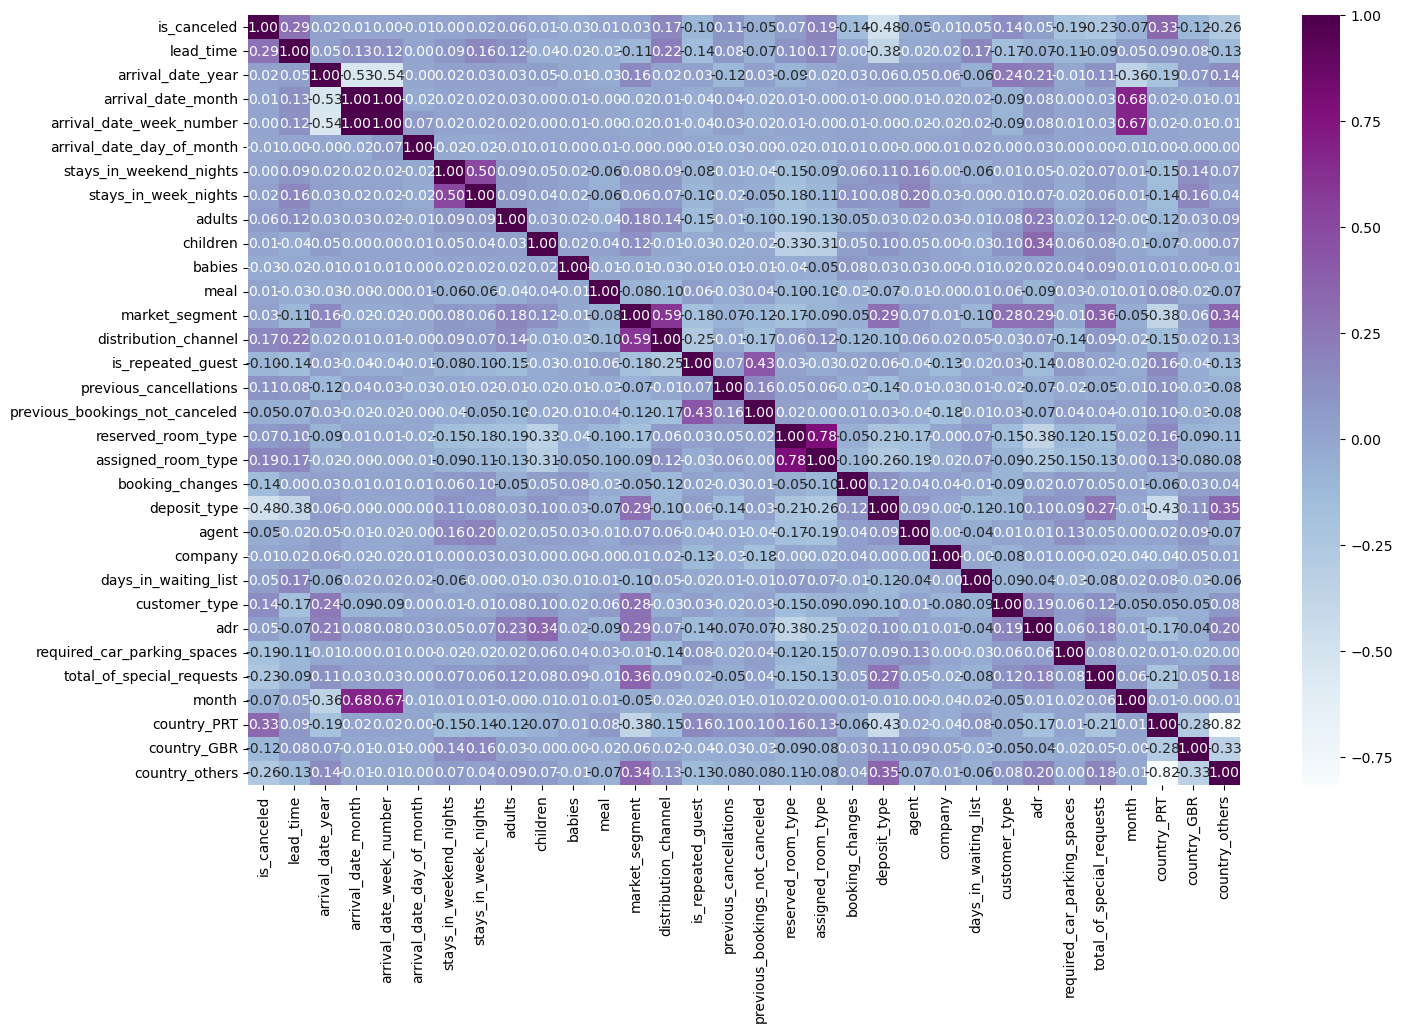

In [56]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

we dont need drop any column because we're not using regression model

### CHECKING OUTLIERS

In [57]:
numsbin = ['is_canceled','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','meal','market_segment','distribution_channel','is_repeated_guest', 'previous_cancellations']

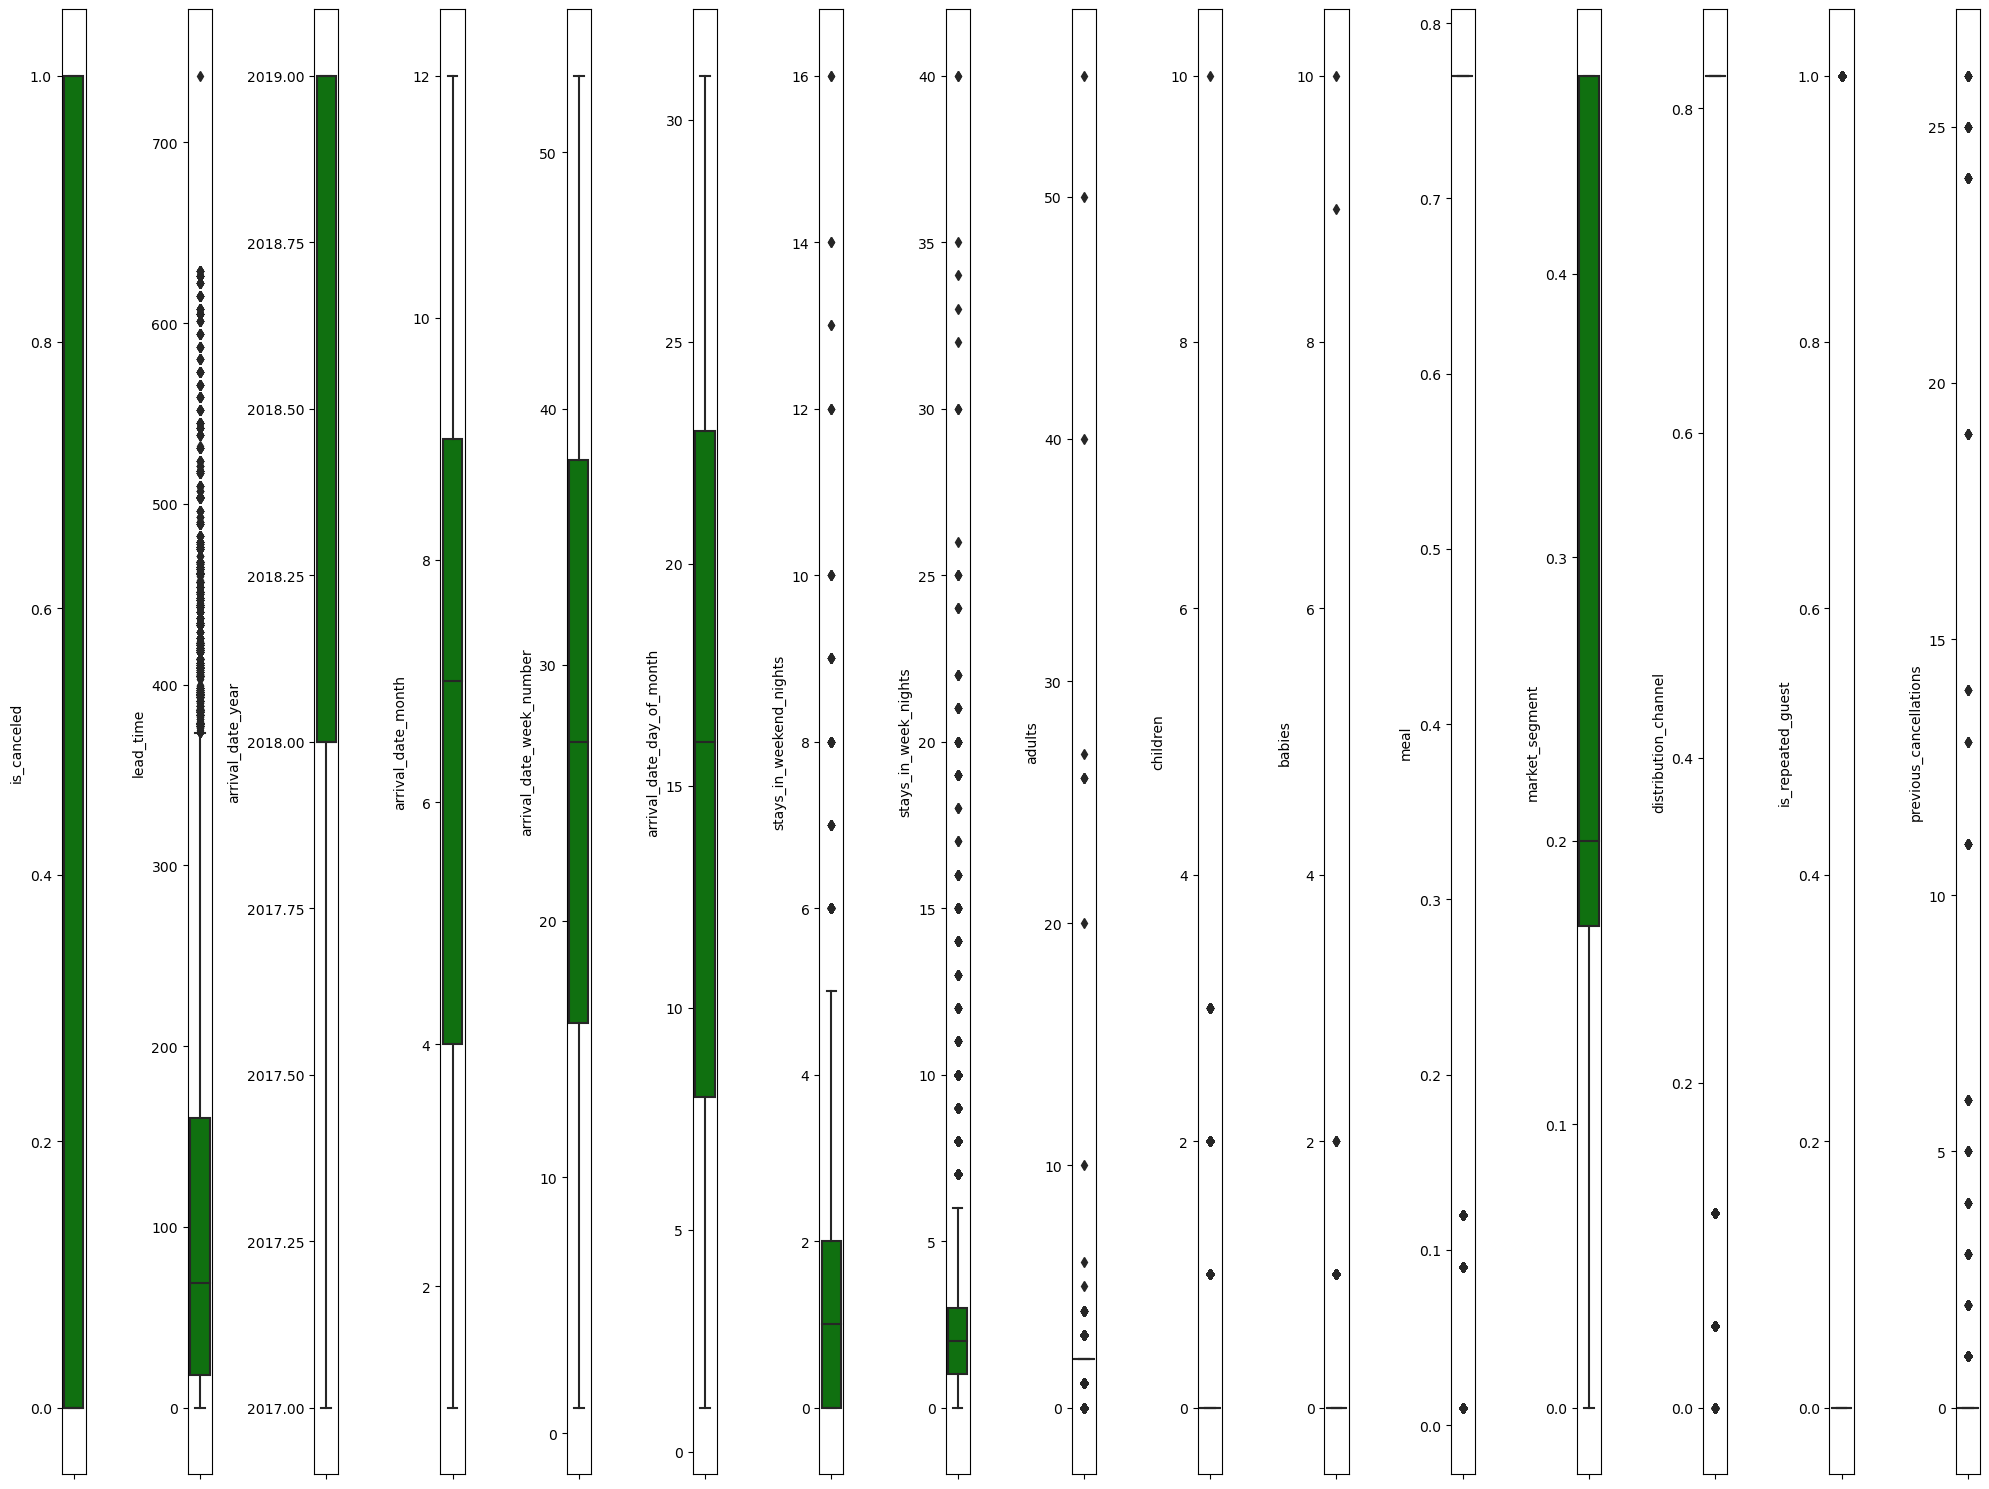

In [58]:
plt.figure(figsize=(20,15))
features = numsbin
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green')
    plt.tight_layout()

In [59]:
numsbin2 = ['previous_bookings_not_canceled', 'reserved_room_type','assigned_room_type','booking_changes', 'deposit_type', 'agent', 'company','days_in_waiting_list','customer_type','adr', 'required_car_parking_spaces', 'total_of_special_requests', 'country_PRT','country_GBR','country_others']

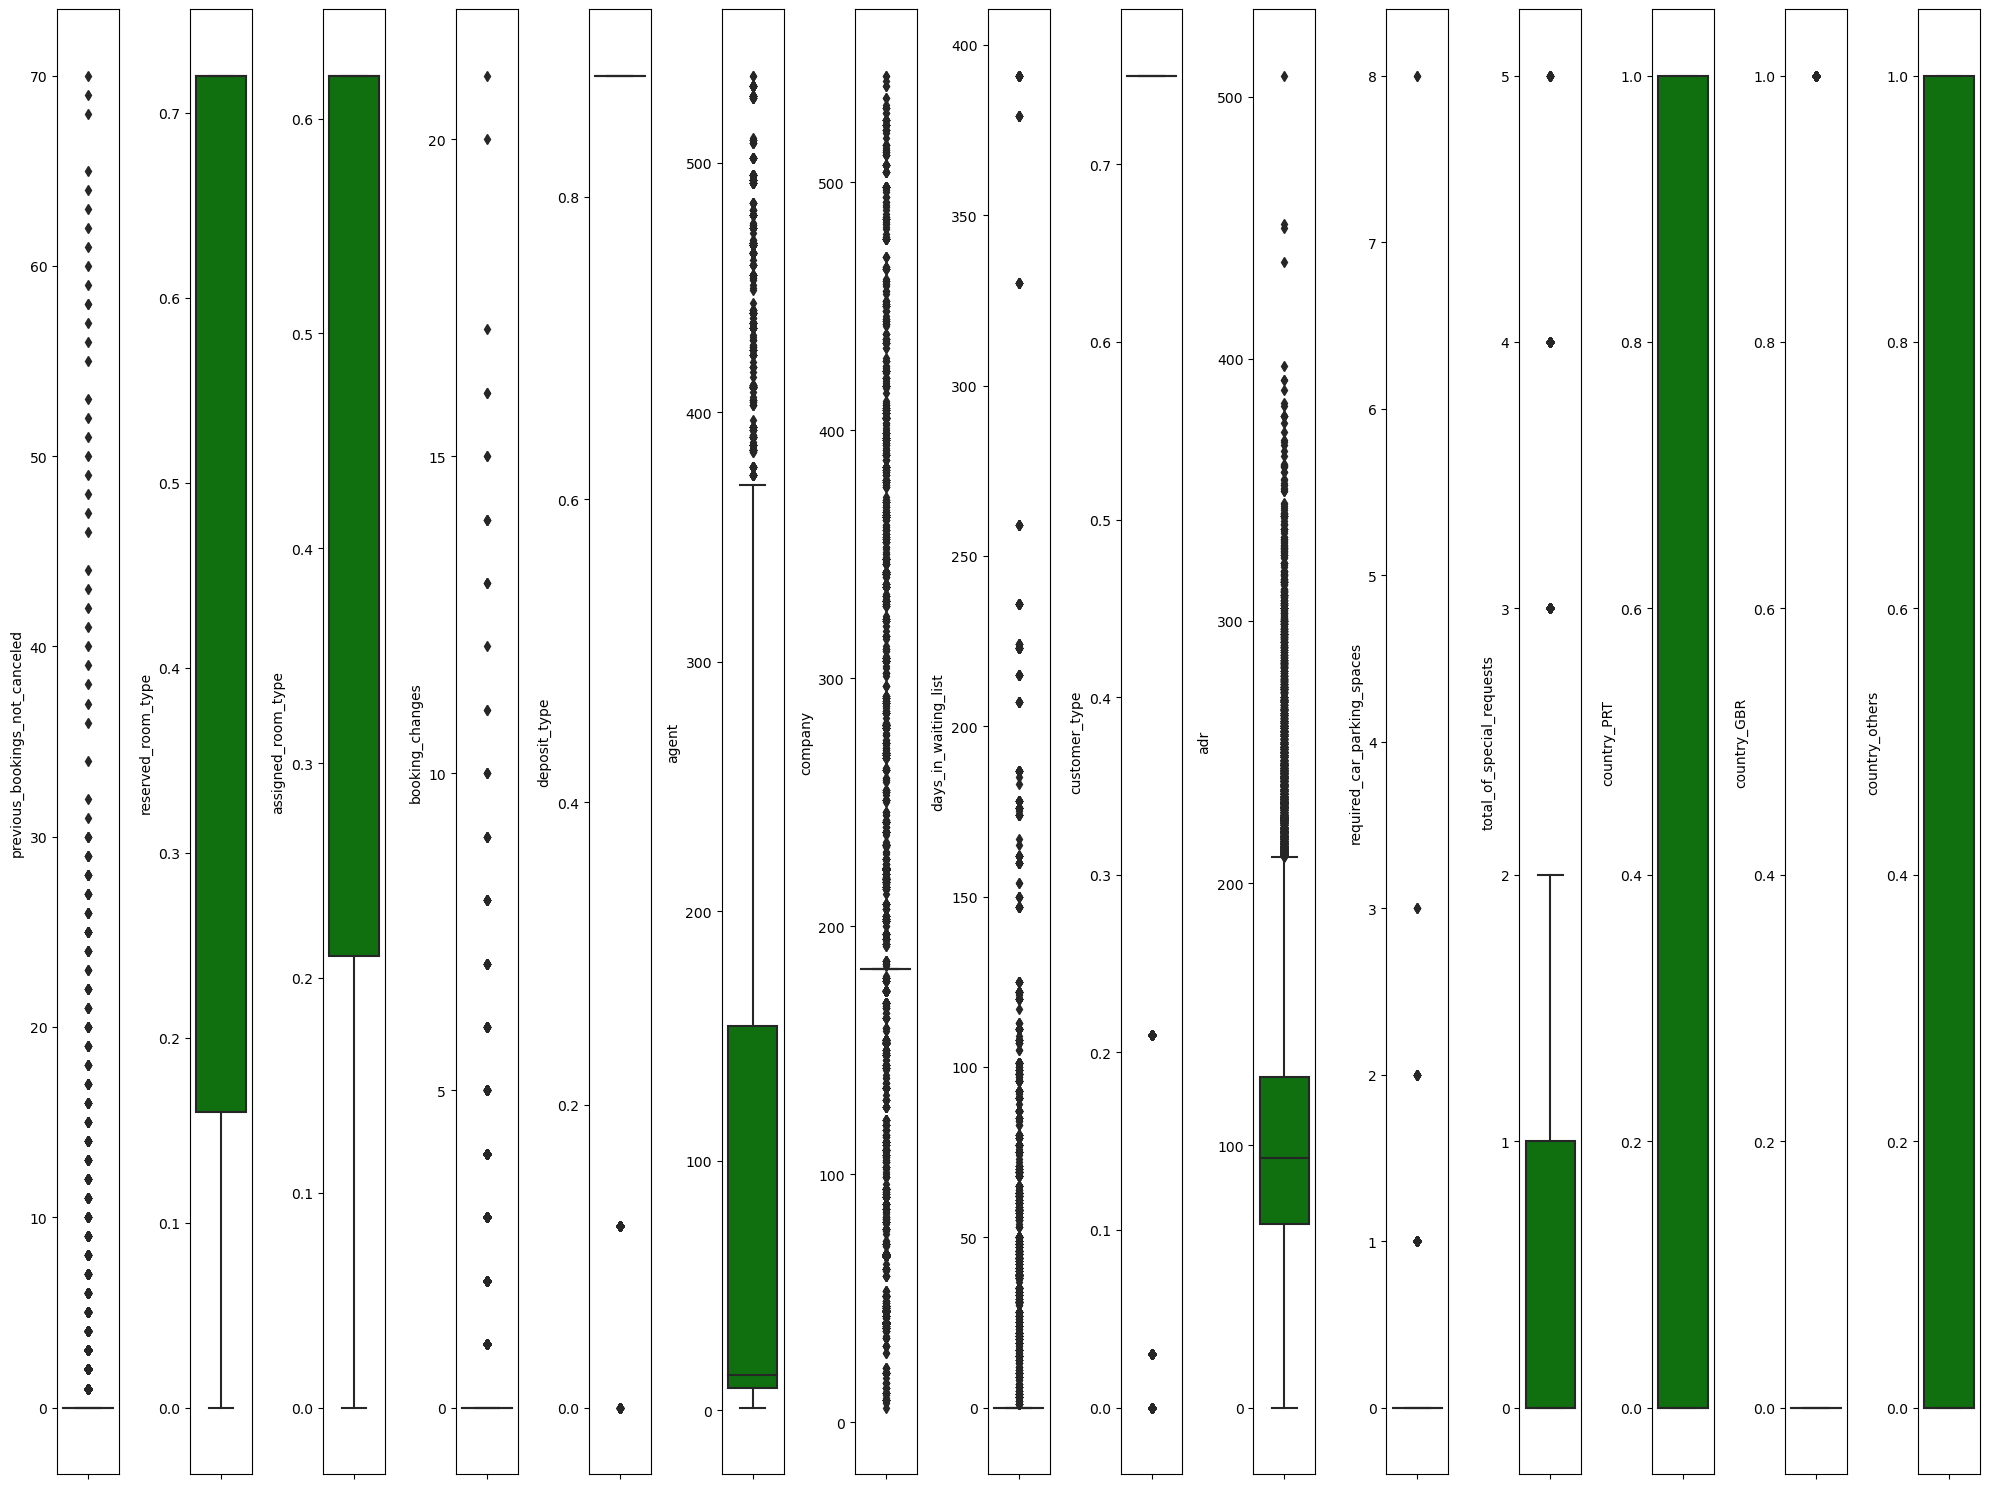

In [60]:
plt.figure(figsize=(20,15))
features = numsbin2
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green')
    plt.tight_layout()

__OUTLIERS HANDLING__

In [61]:
outlier_features =['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','previous_cancellations','previous_bookings_not_canceled','booking_changes','agent', 'company','days_in_waiting_list','adr']
for i in outlier_features:
    df[i] = np.log(df[i]+1)

outlier_features1 =['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','previous_cancellations','previous_bookings_not_canceled','booking_changes','agent', 'company','days_in_waiting_list','adr']
for i in outlier_features1:
    df1[i] = np.log(df1[i]+1)

In [62]:
df.drop(columns = ['month'],inplace = True)

In [63]:
df1['adr'].fillna(df1['adr'].median(), inplace = True)

## BASELINE MODEL

### SPLITTING THE DATASET

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_train, y_train = df.drop('is_canceled', axis=1), df['is_canceled']
X_test, y_test = df1.drop('is_canceled', axis=1), df1['is_canceled']

__RANDOM FOREST MODEL__

In [65]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print('F1 Score ',f1_score(y_test, y_pred_rf))
print('Precision ',precision_score(y_test, y_pred_rf))
print('Recall ',recall_score(y_test, y_pred_rf))

F1 Score  0.8510169558204492
Precision  0.8830829523187459
Recall  0.8211980867056412


__DECISION TREE MODEL__

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)

print('F1 Score ',f1_score(y_test, y_pred_dt))
print('Precision ',precision_score(y_test, y_pred_dt))
print('Recall ',recall_score(y_test, y_pred_dt))

F1 Score  0.8061417441948415
Precision  0.803104513601085
Recall  0.8092020347733657


__XGBOOST MODEL__

In [67]:
from xgboost import XGBClassifier, XGBRegressor

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_test)

print('F1 Score ',f1_score(y_test, y_pred_xgb))
print('Precision ',precision_score(y_test, y_pred_xgb))
print('Recall ',recall_score(y_test, y_pred_xgb))

F1 Score  0.8321468122132573
Precision  0.8684884008916041
Recall  0.7987244704274542


### HANDLING IMBALANCE DATA

In [68]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier, XGBRegressor

X_train, y_train = df.drop('is_canceled', axis=1), df['is_canceled']
X_test, y_test = df1.drop('is_canceled', axis=1), df1['is_canceled']

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [71]:
rf_model_sm = RandomForestClassifier(random_state=42)
rf_model_sm.fit(X_train_resampled, y_train_resampled)
y_pred_sm_rf = rf_model_sm.predict(X_test)
rf_report = classification_report(y_test, y_pred_sm_rf, output_dict=True)
rf_accuracy = accuracy_score(y_test, y_pred_sm_rf)

# Fit and predict using Decision Tree
dt_model_sm = DecisionTreeClassifier(random_state=42)
dt_model_sm.fit(X_train_resampled, y_train_resampled)
y_pred_sm_dt = dt_model_sm.predict(X_test)
dt_report = classification_report(y_test, y_pred_sm_dt, output_dict=True)
dt_accuracy = accuracy_score(y_test, y_pred_sm_dt)

# Fit and predict using XGBoost
xgb_model_sm = XGBClassifier(random_state=42)
xgb_model_sm.fit(X_train_resampled, y_train_resampled)
y_pred_sm_xgb = xgb_model_sm.predict(X_test)
xgb_report = classification_report(y_test, y_pred_sm_xgb, output_dict=True)
xgb_accuracy = accuracy_score(y_test, y_pred_sm_xgb)

# Extracting the required metrics for each model
models = ['Random Forest', 'Decision Tree', 'XGBOOST']
accuracies = [rf_accuracy, dt_accuracy, xgb_accuracy]
precisions = [rf_report['weighted avg']['precision'], dt_report['weighted avg']['precision'], xgb_report['weighted avg']['precision']]
recalls = [rf_report['weighted avg']['recall'], dt_report['weighted avg']['recall'], xgb_report['weighted avg']['recall']]
f1_scores = [rf_report['weighted avg']['f1-score'], dt_report['weighted avg']['f1-score'], xgb_report['weighted avg']['f1-score']]

# Creating the DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
})

results_df

Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest  0.891270   0.890828  0.891270  0.890954
1  Decision Tree  0.820396   0.828016  0.820396  0.822301
2        XGBOOST  0.869699   0.870976  0.869699  0.870166

### MODEL EVALUATING

__CHECKING COFUSION MATRIX__

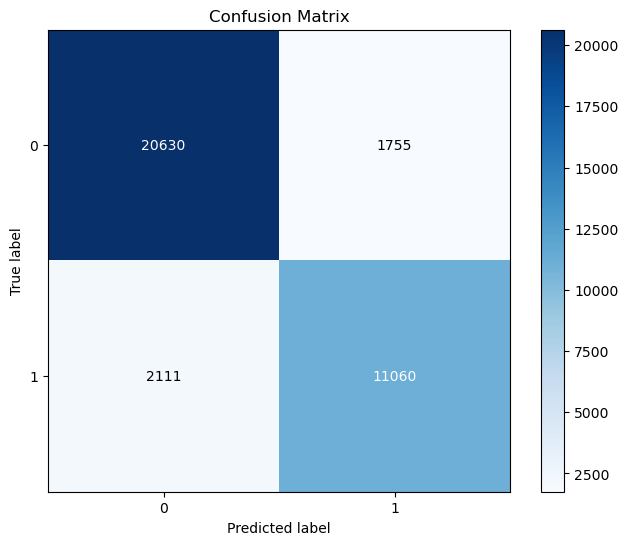

In [72]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_test, y_pred_sm_rf, figsize=(8, 6), title="Confusion Matrix")
plt.show()

__CHECKING ROC CURVES__

In [73]:
rf_pred_proba = rf_model_sm.predict_proba(X_test)

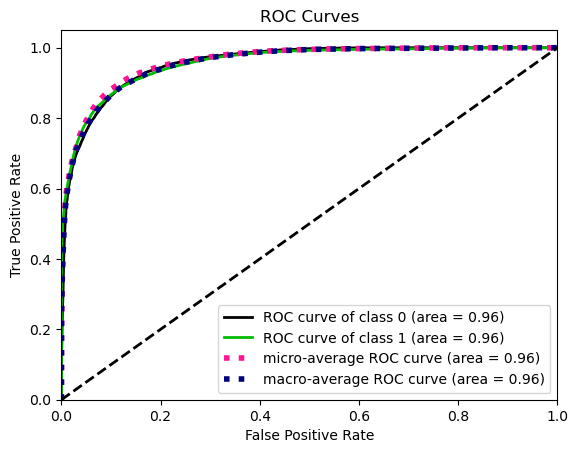

In [74]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score

skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

__CHECKING FEATURE IMPORTANCE__

In [75]:
import dalex as dx

clasf_rf_exp = dx.Explainer(rf_model_sm, X_train_resampled, y_train_resampled, label = "RF Interpretation")

Preparation of a new explainer is initiated

  -> data              : 104436 rows 30 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 104436 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF Interpretation
  -> predict function  : <function yhat_proba_default at 0x000002AD3D247740> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.501, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.955, mean = -0.0013, max = 0.967
  -> model_info        : package sklearn

A new explainer has been created!


In [76]:
clasf_rf_exp.model_parts().plot()